In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
%matplotlib inline

In [2]:
cash = 107000

In [3]:
df = pd.read_csv('/home/tomek/ib_tools/blotter/blotter_combined.csv')
del df['sys_time']
del df['exec_ids']
try:
    del df['perm_id']
    del df['com_reports']
except:
    pass
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])

In [4]:
df[df['contract'] == 'NQ']

,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,
2020-06-22 14:04:01.036903+00:00,NQ,BUY,1,10040.25,1205,ENTRY,2.1,0.0,107000.00
2020-06-22 15:00:02.192075+00:00,NQ,SELL,1,10019.75,1206,STOP-LOSS,2.1,-414.2,106585.80
2020-06-22 15:52:30.800082+00:00,NQ,BUY,1,10059.25,1207,ENTRY,2.1,0.0,106585.80
2020-06-22 19:18:05.790926+00:00,NQ,SELL,1,10083.75,1208,STOP-LOSS,2.1,485.8,107071.60
2020-06-22 20:00:01.473978+00:00,NQ,BUY,1,10111.00,1211,ENTRY,2.1,0.0,107071.60
...,...,...,...,...,...,...,...,...,...
2020-07-14 20:13:34.226830+00:00,NQ,SELL,1,10646.00,1251,STOP-LOSS,2.1,-604.2,109306.23
2020-07-14 22:40:01.100807+00:00,NQ,BUY,1,10715.75,1406,ENTRY,2.1,0.0,109243.79
2020-07-15 02:38:48.973478+00:00,NQ,SELL,1,10691.25,1408,STOP-LOSS,2.1,-494.2,108749.59


In [5]:
df[df['contract'] == 'NQ']

,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,
2020-06-22 14:04:01.036903+00:00,NQ,BUY,1,10040.25,1205,ENTRY,2.1,0.0,107000.00
2020-06-22 15:00:02.192075+00:00,NQ,SELL,1,10019.75,1206,STOP-LOSS,2.1,-414.2,106585.80
2020-06-22 15:52:30.800082+00:00,NQ,BUY,1,10059.25,1207,ENTRY,2.1,0.0,106585.80
2020-06-22 19:18:05.790926+00:00,NQ,SELL,1,10083.75,1208,STOP-LOSS,2.1,485.8,107071.60
2020-06-22 20:00:01.473978+00:00,NQ,BUY,1,10111.00,1211,ENTRY,2.1,0.0,107071.60
...,...,...,...,...,...,...,...,...,...
2020-07-14 20:13:34.226830+00:00,NQ,SELL,1,10646.00,1251,STOP-LOSS,2.1,-604.2,109306.23
2020-07-14 22:40:01.100807+00:00,NQ,BUY,1,10715.75,1406,ENTRY,2.1,0.0,109243.79
2020-07-15 02:38:48.973478+00:00,NQ,SELL,1,10691.25,1408,STOP-LOSS,2.1,-494.2,108749.59


In [6]:
c = set(df['contract'])
allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
#allocs = pd.Series([1/3, 2/3, 1], index=['ES','NQ', 'total'])

In [7]:
allocs

MYM  SEP     0.125
MES          0.125
NQ           0.125
MGC          0.125
YM   SEP     0.125
MNQ          0.125
ES           0.125
GC           0.125
total        1.000
dtype: float64

In [8]:
df.groupby('contract').realizedPNL.sum()

contract
ES          -2683.60
GC            491.28
MES          -250.05
MGC            67.34
MNQ          1759.56
MYM  SEP    -1187.72
NQ           5679.20
YM   SEP    -2797.00
Name: realizedPNL, dtype: float64

In [9]:
df.realizedPNL.sum()

1079.0099999999995

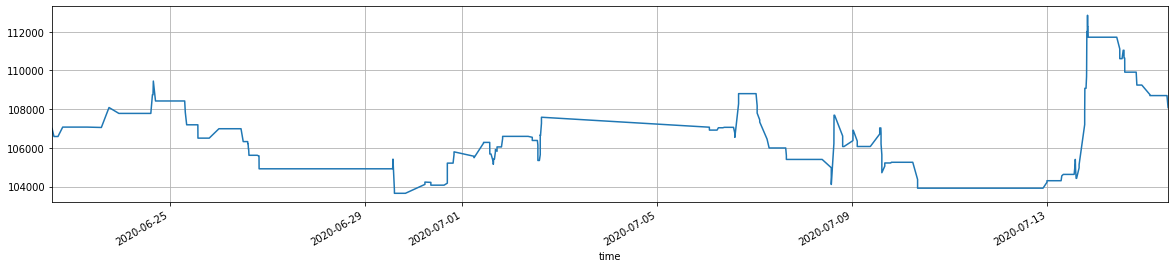

In [10]:
df.cash.plot(figsize=(20,4), grid=True);

In [11]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [12]:
# monthly average number of transactions
by_contract.resample('B').count().resample('M').mean()

contract,ES,GC,MES,MGC,MNQ,MYM SEP,NQ,YM SEP,total
time,,,,,,,,,
2020-06-30 00:00:00+00:00,1.428571,0.142857,0.285714,0.142857,1.142857,0.428571,5.571429,0.428571,9.571429
2020-07-31 00:00:00+00:00,0.727273,1.363636,0.727273,1.363636,5.454545,1.636364,5.454545,1.636364,18.363636


In [13]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES           18
 GC           16
 MES          10
 MGC          16
 MNQ          68
 MYM  SEP     21
 NQ           99
 YM   SEP     21
 Name: action, dtype: int64, 269)

In [14]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES           1.000000
 GC           0.888889
 MES          0.555556
 MGC          0.888889
 MNQ          3.777778
 MYM  SEP     1.166667
 NQ           5.500000
 YM   SEP     1.166667
 Name: action, dtype: float64, 14.944444444444445)

In [15]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES            37.80
GC            38.72
MES           18.80
MGC           36.66
MNQ           94.94
MYM  SEP      38.54
NQ           207.90
YM   SEP      44.10
Name: commission, dtype: float64

In [16]:
df.commission.sum()

517.46

In [17]:
# per trade stats
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss','win_ratio', 'EV',
                               'number_of_positions'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    row['average_PNL'] = round(d.realizedPNL.mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0]).realizedPNL.mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0]).realizedPNL.mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_positions'] = d.realizedPNL.count()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV,number_of_positions
NQ,0.51,115.90,634.60,-424.41,1.50,115.69,49.0
ES,0.25,-335.45,1352.05,-897.95,1.51,-335.45,8.0
MNQ,0.62,51.75,171.94,-142.40,1.21,52.49,34.0
MES,0.40,-50.01,466.86,-394.59,1.18,-50.01,5.0
MYM SEP,0.20,-118.77,289.05,-220.73,1.31,-118.77,10.0
YM SEP,0.20,-279.70,590.80,-497.33,1.19,-279.70,10.0
GC,0.38,61.41,1081.83,-550.84,1.96,69.57,8.0
MGC,0.38,8.42,538.55,-309.66,1.74,12.66,8.0
total,0.45,8.17,495.57,-397.99,1.25,4.11,132.0


In [18]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [19]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,GC,MES,MGC,MNQ,MYM SEP,NQ,YM SEP,total
ES,1.000000,-0.178788,0.801721,-0.205041,0.661316,0.136110,0.373403,0.134688,0.705490
GC,-0.178788,1.000000,-0.212269,0.918930,-0.263374,-0.759033,-0.206424,-0.792893,-0.078347
MES,0.801721,-0.212269,1.000000,-0.216112,0.696392,0.149857,0.477584,0.166211,0.723657
MGC,-0.205041,0.918930,-0.216112,1.000000,-0.286709,-0.849817,-0.180328,-0.849595,-0.107981
MNQ,0.661316,-0.263374,0.696392,-0.286709,1.000000,0.330834,0.777054,0.331657,0.895634
MYM SEP,0.136110,-0.759033,0.149857,-0.849817,0.330834,1.000000,0.239085,0.993307,0.249198
NQ,0.373403,-0.206424,0.477584,-0.180328,0.777054,0.239085,1.000000,0.233091,0.863302
YM SEP,0.134688,-0.792893,0.166211,-0.849595,0.331657,0.993307,0.233091,1.000000,0.239038
total,0.705490,-0.078347,0.723657,-0.107981,0.895634,0.249198,0.863302,0.239038,1.000000


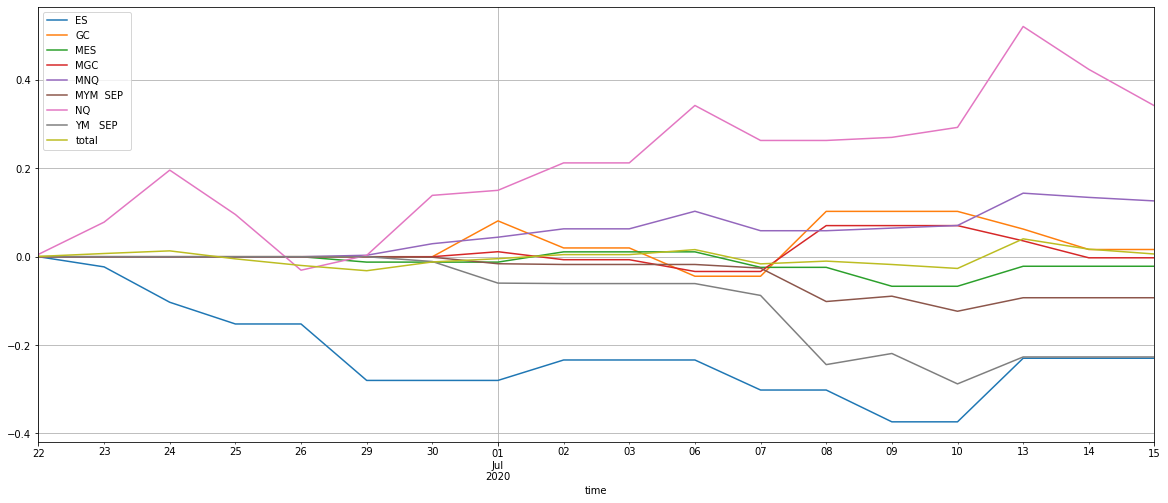

In [20]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

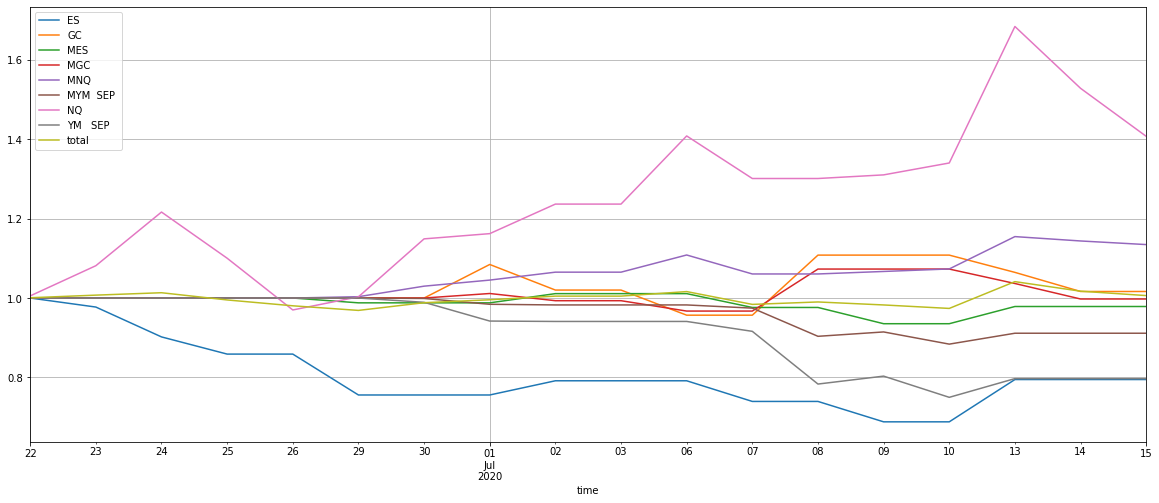

In [21]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [22]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,GC,MES,MGC,MNQ,MYM SEP,NQ,YM SEP,total
Annual return,-0.959931,0.256914,-0.260894,-0.033595,4.860257,-0.727468,118.512358,-0.958264,0.089724
Cumulative returns,-0.205304,0.016467,-0.021362,-0.002438,0.134622,-0.088676,0.407300,-0.202987,0.006156
Annual volatility,0.913140,0.798757,0.292466,0.482093,0.381797,0.331044,1.575196,0.674512,0.345810
Sharpe ratio,-3.076200,0.643797,-0.894923,0.146210,4.823980,-3.755453,3.773869,-4.340472,0.408256
Calmar ratio,-3.078197,2.181434,-3.481562,-0.478034,112.693180,-6.264733,584.615182,-3.831108,2.042235
Stability,0.494019,0.172914,0.331422,0.120363,0.834790,0.761930,0.728587,0.814225,0.030774
Max drawdown,-0.311848,-0.117773,-0.074936,-0.070278,-0.043128,-0.116121,-0.202719,-0.250127,-0.043934
Omega ratio,0.501902,1.178375,0.788770,1.043492,3.171010,0.327383,1.919500,0.296989,1.079501
Sortino ratio,-4.178927,1.312523,-1.258027,0.314892,10.968882,-4.053577,7.593193,-4.633220,0.757707
Skew,0.890727,1.754907,0.135822,2.554247,0.999149,-1.900864,0.557786,-1.659739,1.599640


In [23]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,GC,MES,MGC,MNQ,MYM SEP,NQ,YM SEP,total
time,,,,,,,,,
2020-06-30 00:00:00+00:00,-24.42,0.00,-1.21,0.00,2.99,-0.11,14.90,-1.08,-1.18
2020-07-31 00:00:00+00:00,5.15,1.65,-0.93,-0.24,10.17,-8.77,22.48,-19.43,1.82


In [24]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES          -21.0
GC            2.0
MES          -2.0
MGC          -0.0
MNQ          13.0
MYM  SEP     -9.0
NQ           41.0
YM   SEP    -20.0
total         1.0
dtype: float64

In [25]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2020-07-08 15:02:34.347271+00:00,GC,SELL,1821.30,2115.16
2020-07-13 18:31:51.396443+00:00,ES,SELL,3195.00,2070.80
2020-07-06 16:06:38.051852+00:00,NQ,SELL,10580.75,1735.80
2020-07-13 19:35:41.507581+00:00,NQ,BUY,10642.75,1650.80
2020-07-08 15:06:32.616442+00:00,MGC,SELL,1821.10,1463.42
...,...,...,...,...
2020-07-10 08:15:18.203095+00:00,YM SEP,BUY,25515.00,-889.20
2020-07-09 14:38:56.544836+00:00,ES,SELL,3142.50,-929.20
2020-06-24 16:59:36.733994+00:00,ES,BUY,3051.00,-1029.20


In [26]:
daily.sort_values('total', ascending=False)

,ES,GC,MES,MGC,MNQ,MYM SEP,NQ,YM SEP,total
time,,,,,,,,,
2020-07-13 00:00:00+00:00,0.154826,-0.039240,0.046331,-0.033908,0.075921,0.031050,0.256553,0.062864,0.069300
2020-06-30 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.026461,-0.001117,0.145600,-0.010781,0.020020
2020-07-06 00:00:00+00:00,0.000000,-0.062032,0.000000,-0.026277,0.040625,0.000000,0.138811,0.000000,0.011391
2020-07-02 00:00:00+00:00,0.047350,-0.059427,0.023480,-0.017930,0.019092,-0.001669,0.064045,-0.001062,0.009235
2020-07-01 00:00:00+00:00,0.000000,0.084510,0.000000,0.011382,0.014858,-0.014665,0.011454,-0.047731,0.007476
2020-06-23 00:00:00+00:00,-0.022744,0.000000,0.000000,0.000000,0.000000,0.000000,0.075634,0.000000,0.006611
2020-07-08 00:00:00+00:00,0.000000,0.158143,0.000000,0.109415,0.000000,-0.072852,0.000000,-0.144927,0.006222
2020-06-24 00:00:00+00:00,-0.076950,0.000000,0.000000,0.000000,0.000000,0.000000,0.124979,0.000000,0.006004
2020-06-22 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005353,0.000000,0.000669
